<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/Prediction_of_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d9425b479a4795c9db1074053749115b435167ff02b5dc640b7606f019744578
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


3.8683671507584045


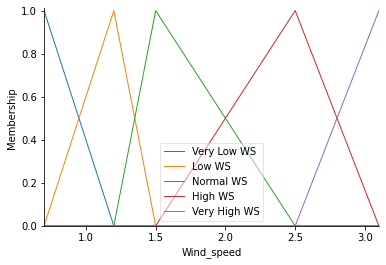

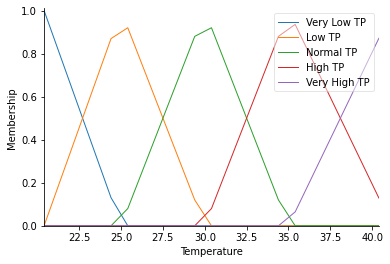

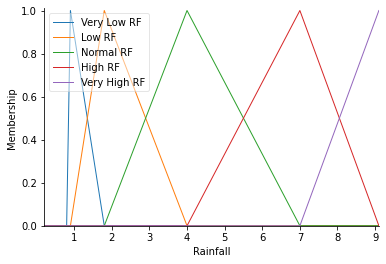

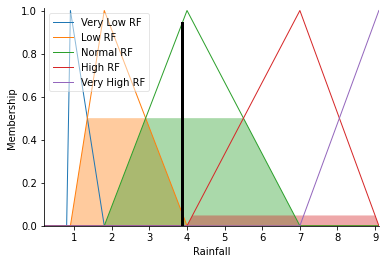

In [4]:

import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

Wind_speed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'Wind_speed')
Temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'Temperature')
Rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'Rainfall')

Wind_speed['Very Low WS']= fuzz.trimf(Wind_speed.universe,[0.7,0.7,1.2])
Wind_speed['Low WS']= fuzz.trimf(Wind_speed.universe,[0.7,1.2,1.5])
Wind_speed['Normal WS']= fuzz.trimf(Wind_speed.universe,[1.2,1.5,2.5])
Wind_speed['High WS']= fuzz.trimf(Wind_speed.universe,[1.5,2.5,3.1])
Wind_speed['Very High WS']= fuzz.trimf(Wind_speed.universe,[2.5,3.1,3.1])

Temperature['Very Low TP']= fuzz.trimf(Temperature.universe,[20.4,20.4,25])
Temperature['Low TP']= fuzz.trimf(Temperature.universe,[20.4,25,30])
Temperature['Normal TP']= fuzz.trimf(Temperature.universe,[25,30,35])
Temperature['High TP']= fuzz.trimf(Temperature.universe,[30,35,41.2])
Temperature['Very High TP']= fuzz.trimf(Temperature.universe,[35,41.2,41.2])

Rainfall['Very Low RF']= fuzz.trimf(Rainfall.universe,[0.9,0.9,1.8])
Rainfall['Low RF']= fuzz.trimf(Rainfall.universe,[0.9,1.8,4])
Rainfall['Normal RF']= fuzz.trimf(Rainfall.universe,[1.8,4,7])
Rainfall['High RF']= fuzz.trimf(Rainfall.universe,[4,7,9.1])
Rainfall['Very High RF']= fuzz.trimf(Rainfall.universe,[7,9.1,9.11])


Wind_speed.view()
Temperature.view()
Rainfall.view()


rule1 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Very Low TP'], Rainfall['Very Low RF'])
rule2 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Low TP'], Rainfall['Very Low RF'])
rule3 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Normal TP'], Rainfall['Normal RF'])
rule4 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Very Low TP'], Rainfall['Normal RF'])
rule5 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['High TP'], Rainfall['Low RF'])
rule6 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Low TP'], Rainfall['High RF'])
rule7 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Very High TP'], Rainfall['Low RF'])
rule8 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule9 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule10 = ctrl.Rule(Wind_speed['High WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule11= ctrl.Rule(Wind_speed['Very High WS']& Temperature['Normal TP'], Rainfall['Very Low RF'])
rule12 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Very Low TP'], Rainfall['High RF'])
rule13 = ctrl.Rule(Wind_speed['High WS']& Temperature['Very Low TP'], Rainfall['Low RF'])
rule14 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Very Low TP'], Rainfall['Very High RF'])
rule15 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Low TP'], Rainfall['High RF'])
rule16= ctrl.Rule(Wind_speed['High WS']& Temperature['Low TP'], Rainfall['Normal RF'])
rule17 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Low TP'], Rainfall['Very High RF'])
rule18 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['High TP'], Rainfall['Low RF'])
rule19 = ctrl.Rule(Wind_speed['Low WS']& Temperature['High TP'], Rainfall['Very Low RF'])
rule20 = ctrl.Rule(Wind_speed['High WS']& Temperature['High TP'], Rainfall['Low RF'])
rule21= ctrl.Rule(Wind_speed['Very High WS']& Temperature['High TP'], Rainfall['Very Low RF'])
rule22 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule23 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule24 = ctrl.Rule(Wind_speed['High WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule25 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Very High TP'], Rainfall['Very High RF'])



Rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25])
Rainfalling= ctrl.ControlSystemSimulation(Rainfalling_ctrl)
Rainfalling.input['Temperature']= 30
Rainfalling.input['Wind_speed']= 2
Rainfalling.compute()
print(Rainfalling.output['Rainfall'])
Rainfall.view(sim=Rainfalling)